#### Here we will find the digits from a handwritten digit's image

- Here the neural network's design will be like the following

<img src="images/image classification.png" width="600">

- Here ***Output layer*** will have **`10`** **Neurons** as here we are classifying an image into 10 different classes, from **`0 to 9`**.
- Here we are using ***Sigmoid*** as the ***Activation Function***.
- To feed image to the nodes we will use the pixels as arrays to represent the images like here we did for image of **`2`**.

<img src="images/digit1.png" width="600">

- Then we can flatten the array i.e. **Converting the 2 dimensional array to a 1 dimensional array** to supply it to the nodes. As there are **7X7** grids in the 2 dimensional array so we will have **49** nodes.

<img src="images/digit2.png" width="600">

- This neural network doesnot have any hidden layers, it has only input and output. So we can consider the nodes here as Neurons.

- But the actual problem we will solve will have **28X28** grids meaning **784** nodes.
- Remember when we write code in **Python** and **Tensorflow** we first solve the problem in simple way, then we will add hidden layers and see how thw accuracy improves.
- **keras** will give some convenient APIs to use.
- Initially we will have **784** neurons as input layers and **784** output layers with **10** elements.

<img src="images/digit3.png" width="800">

##### Let's do the coding

In [1]:
# importing the libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing handwritten datasets from keras library
# here we are loading the train and test digits dataset into the variables

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Checking number of images in training dataset

len(X_train)

60000

In [4]:
# Checking number of images in test dataset

len(X_test)

10000

In [5]:
# Checking size of an sample as it has 28X28 pixels

X_train[0].shape

(28, 28)

In [6]:
# representation in 2 dimensional array

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

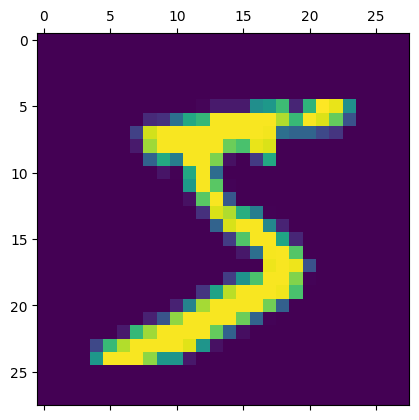

In [8]:
# to see the image

plt.matshow(X_train[0])
plt.show()

In [9]:
# Checking the value with the output column "y"

y_train[0]

5

##### Now flattening the training dataset

In [14]:
# 1st checking the shape of the datasets

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
# Now using the "reshape()" we will reshape the array so we will get output as (60000, 784)

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [16]:
# Now flattening the test dataset as well

X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [17]:
# Now again checking the 1st image but now in 1 dimensional array

X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

#### Now creating the *Simple Neuron Layer*

- Here we use **Sequential()** so we can have a stack of layers in the neural network.
- And since it is a stack so it will accept every layer as one element.
- The **Dense()** will connect one neuron of first layer with every other neuron in the second layer.
- Here output shape is `10` and input shape is `784` (28X28).
- We also need to define the **Activation Function** as here it is ***Sigmoid***.
- **Remember once the variable model is created we need to compile it in *Tensorflow* and *Keras***.
- During compilation we need to pass some parameters:
  - First parameter is ***Optinmizer** allows to train efficiently as it helps to reach to ***Global Optima*** in efficient way during the ***Backward Propagation***.Here we are using ***adam*** as the parameter ***optimizer***. 
  - Second parameter is ***loss***. Here we are using ***sparse_categorical_crossentropy*** as loss function. It means the output class is ***Categorical (0 to 9)***, and **sparse** means the output variable i.e. ***y_train*** is an integer number. If it was ***One hot encoded*** array then we may need to use ***categorical_crossentropy***.
  - Third parameter is ***metrics***. Here we will use ***accuracy***, so the neural network becomes more accurate.
  
- **epochs** is number of iteration the neural network will go to run the training.

In [18]:
# Creating the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])



# Compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



# Training the model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.5104 - accuracy: 0.8419
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0656 - accuracy: 0.8771
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6329 - accuracy: 0.8831
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4434 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2983 - accuracy: 0.8878


In [19]:
# Checking accuracy of the test dataset

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.4107 - accuracy: 0.8990


[5.4106974601745605, 0.8989999890327454]

**Notes**

- To make the model more accurate we can scale the dataset. That is divide the Xtrain and X_test dataset with 255 as in each of the datasets the highes value was 255.

In [23]:
X_train = X_train / 255
X_test = X_test / 255

In [24]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [25]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
# Creating the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])



# Compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



# Training the model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4745 - accuracy: 0.8754
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9266


**Notes:**

- Now we can see the accuracy improved after scaling the dataset.

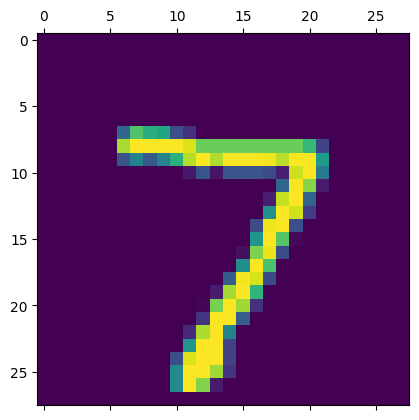

In [27]:
# let's check the first image in test dataset

plt.matshow(X_test[0])
plt.show()

In [28]:
# Now making prediction for the 1st image of the test dataset using the model

y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.5385829e-02, 4.6287656e-07, 1.1253346e-01, 9.5697063e-01,
       4.7620968e-03, 1.4440623e-01, 2.0174675e-06, 9.9986243e-01,
       1.4861727e-01, 7.3562080e-01], dtype=float32)

In [29]:
# Finding the index of the maximum value

np.argmax(y_predicted[0])

7

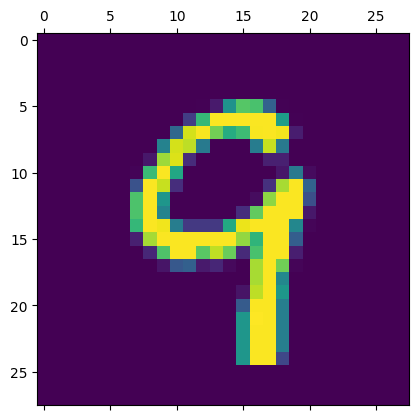

In [30]:
# Checking another image for accuracy, this time the 150th image

plt.matshow(X_test[150])
plt.show()

In [31]:
y_predicted[150]

array([2.9505880e-03, 4.9472677e-05, 4.5129213e-02, 9.7121082e-02,
       9.2611778e-01, 7.1293488e-02, 4.3576051e-02, 2.0327643e-02,
       5.1957971e-01, 9.8903722e-01], dtype=float32)

In [33]:
np.argmax(y_predicted[150])

9

#### Creating the confusion matrix

- In ***Tensorflow*** we have a class named ***math*** which have the ***Confusion Matrix***.

In [34]:
# We cannot pass the y_predicted directly as they are fractioned value but we have integer valueas as y_test

y_predicted[:5]

array([[2.5385829e-02, 4.6287656e-07, 1.1253346e-01, 9.5697063e-01,
        4.7620968e-03, 1.4440623e-01, 2.0174675e-06, 9.9986243e-01,
        1.4861727e-01, 7.3562080e-01],
       [4.2376155e-01, 5.4495130e-03, 9.9942529e-01, 4.4279501e-01,
        6.8486261e-10, 8.4579468e-01, 8.7434602e-01, 7.7638297e-13,
        1.9961013e-01, 3.2226604e-09],
       [3.3011936e-04, 9.9292773e-01, 6.9232786e-01, 2.9629385e-01,
        2.6169209e-02, 8.4526844e-02, 1.4897667e-01, 1.3188516e-01,
        3.2581380e-01, 4.9683847e-02],
       [9.9973941e-01, 4.2878746e-08, 1.3005084e-01, 8.6471708e-03,
        9.9087898e-05, 1.2685032e-01, 1.4852460e-01, 1.5716627e-02,
        4.6240959e-02, 3.5104364e-02],
       [5.1408328e-02, 5.4828801e-05, 1.8267407e-01, 3.8344974e-03,
        9.9390256e-01, 1.4775373e-02, 1.7504261e-01, 1.7167446e-01,
        3.1987607e-01, 7.2622925e-01]], dtype=float32)

In [35]:
# Creating a list of predicted values into integer

y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [36]:
# Now passing the y_predicted_labels as predictions to match them with the labels which have the y_test dataset

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [37]:
# printing the confusion matrix

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    4,    2,    2,    0],
       [   0, 1111,    4,    1,    0,    1,    4,    2,   12,    0],
       [   6,    8,  929,   15,   11,    3,   13,    8,   35,    4],
       [   3,    0,   23,  916,    2,   23,    2,    9,   24,    8],
       [   2,    1,    2,    1,  930,    0,   11,    3,   10,   22],
       [  10,    3,    2,   30,   12,  772,   18,    6,   33,    6],
       [  12,    3,    6,    1,    8,   11,  913,    2,    2,    0],
       [   1,    5,   25,    5,   12,    0,    0,  943,    3,   34],
       [   5,    8,    7,   18,   11,   16,   10,   11,  882,    6],
       [  11,    7,    1,    8,   45,    6,    0,   19,    7,  905]])>

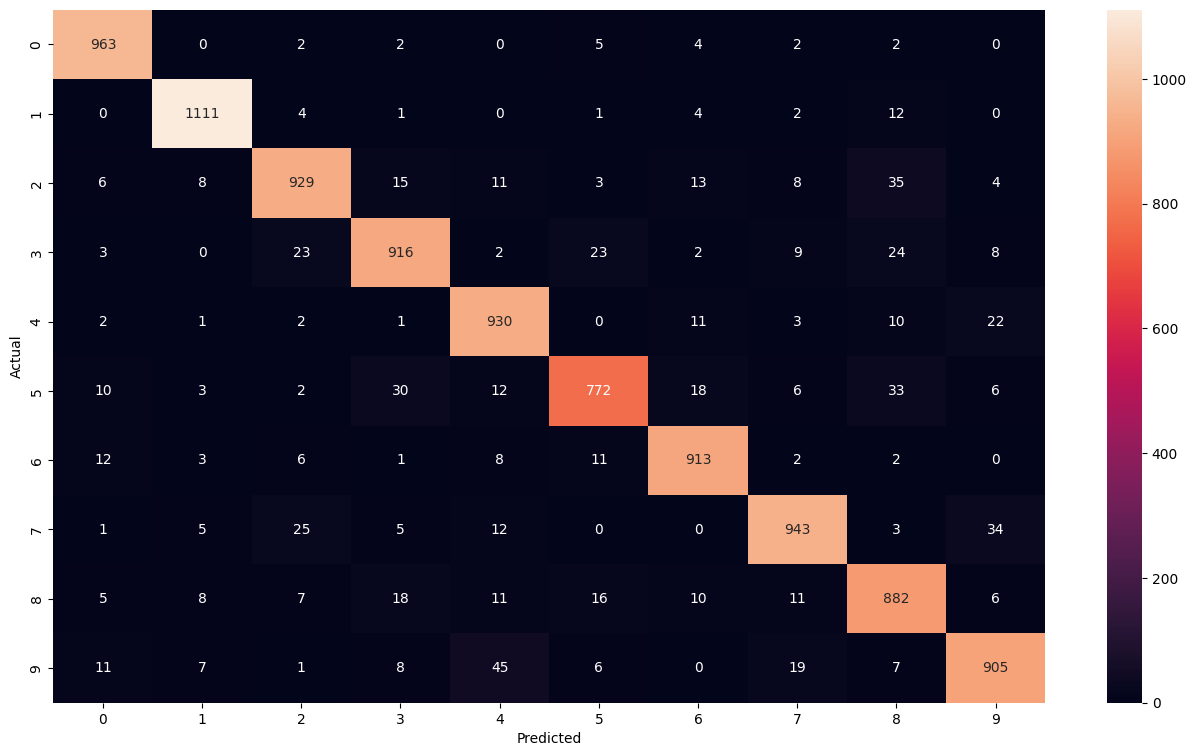

In [38]:
# Let's print it in a more visualized way

import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Now we will add a `hidden layer`

In [39]:
# Creating the model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])



# Compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



# Training the model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1234 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0514 - accuracy: 0.9840


In [40]:
# Again checking accuracy of the test dataset

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9777


[0.07444096356630325, 0.9776999950408936]

313/313 [==============================] - 1s 2ms/step


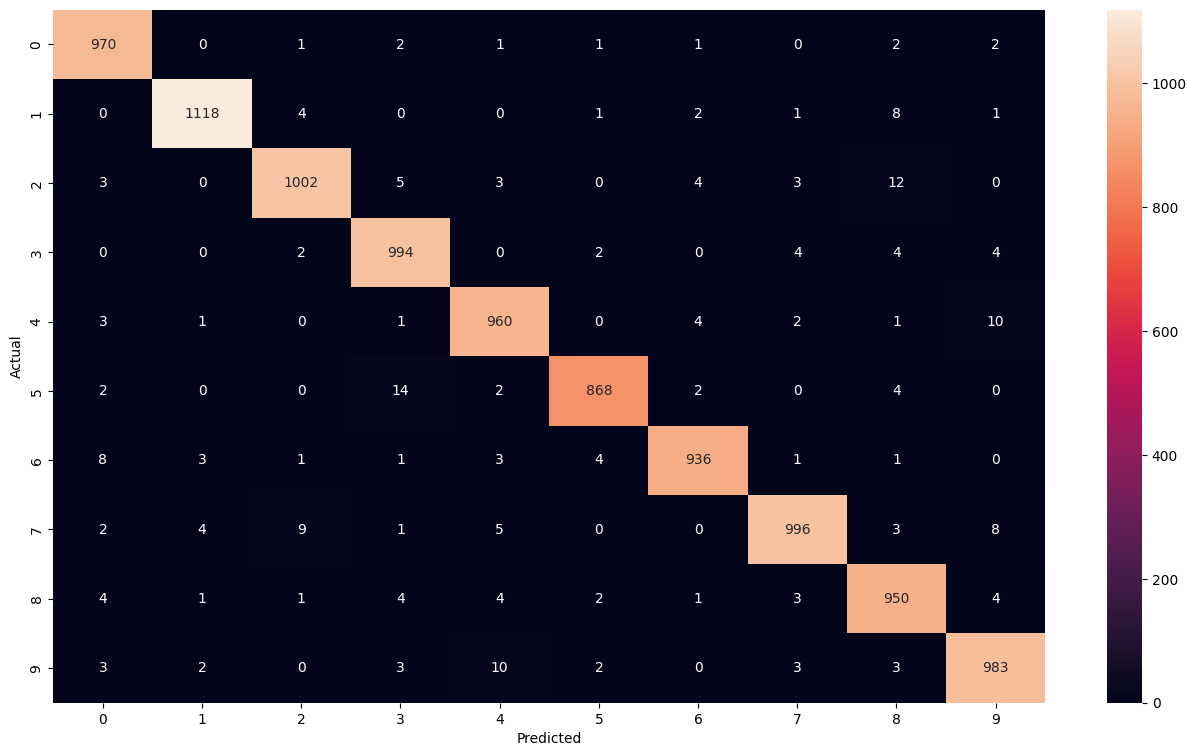

In [41]:
# Again creating confusion matrix but here with a hidden layer

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Incase we don't want to create flattened array and passed the X_train as normal

- There is a **Flatten()** in keras to do that, we need to add it during the model building. We need to give the input shape here.

In [43]:
# Creating the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])



# Compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



# Training the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2751 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1231 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9843


In [44]:
# Again checking accuracy of the test dataset

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9700


[0.09668523818254471, 0.9700000286102295]

313/313 [==============================] - 1s 2ms/step


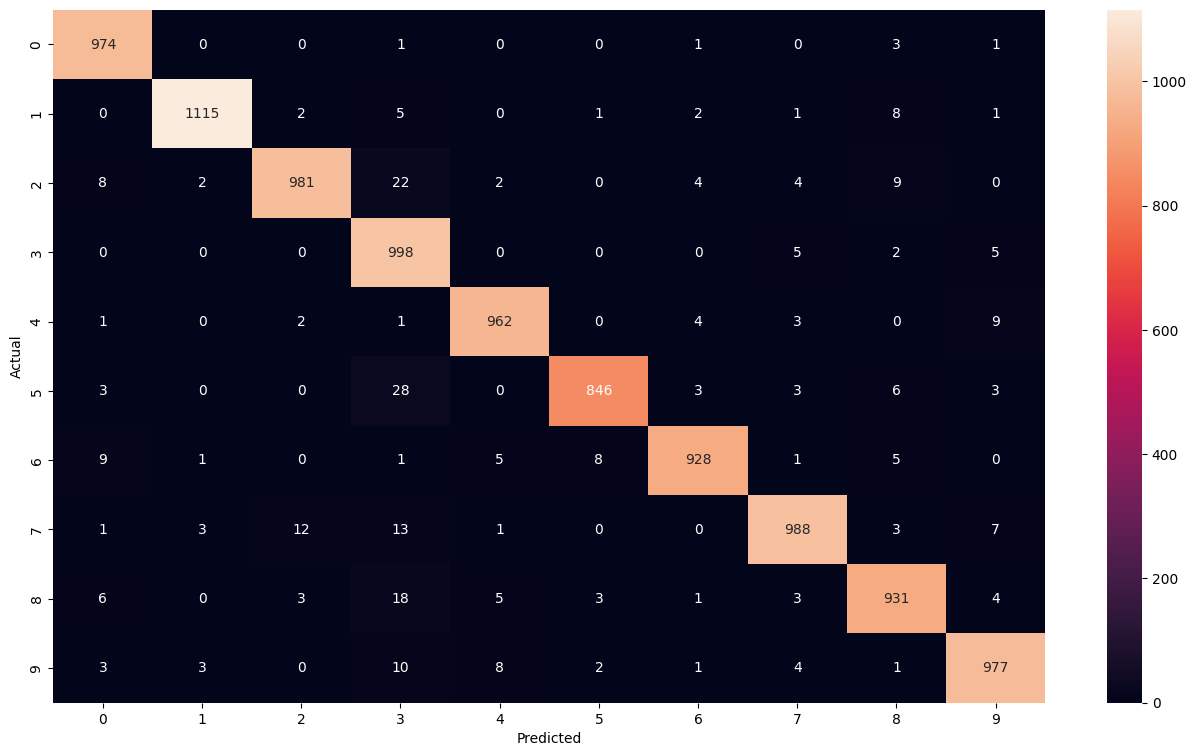

In [45]:
# Again creating confusion matrix but here with a hidden layer

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()